# **Week5**

Wk5 PPA1

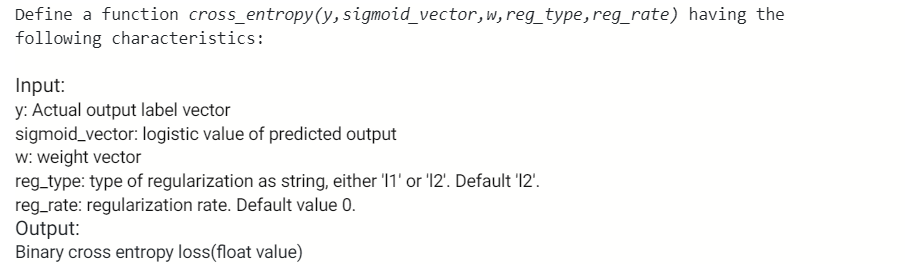

In [ ]:
import numpy as np
def cross_entropy(y,sigmoid_vector,w, reg_type,reg_rate):
    #print(y)
    #print(reg_type)
    reg=0
    Loss_without_reg=-1*(np.sum(y*np.log(sigmoid_vector)+(1-y)*np.log(1-sigmoid_vector)))
    #print(Loss_without_reg)
    if reg_type == 'l1':
        reg = (reg_rate/2)* np.sum(np.abs(w))
    else:
        reg = (reg_rate/2)* (np.transpose(w)@w)
    #print(reg)
    loss=Loss_without_reg+reg
    return loss

Wk5 PPA2

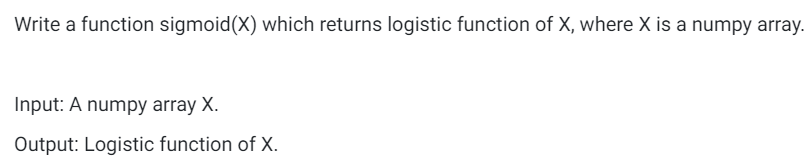

In [ ]:
import numpy as np
def sigmoid(X):
  sig = 1/(1+np.exp(-X))
  return sig

Wk5 GrPA1

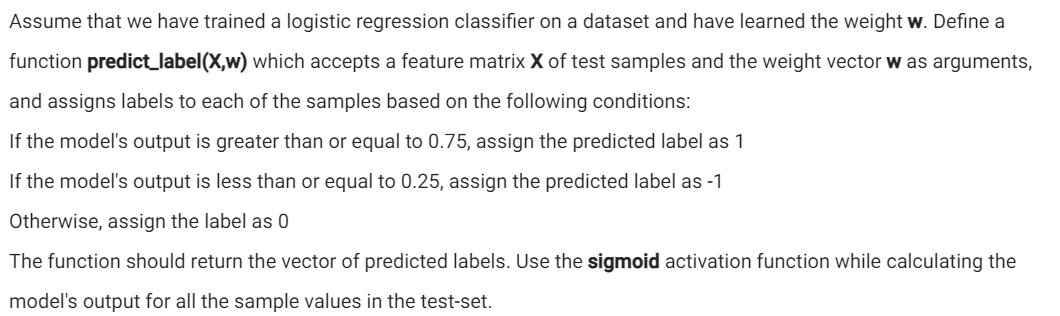

In [ ]:
import numpy as np
def predict_label(x,w):  
  y_hat = 1/(1+np.exp(-(X @ w)))
  labels=[]
  # compute label of the sample
  for y in y_hat:
    if y<=0.25:
      label=-1
    elif y>=0.75:
      label=1
    else:
      label=0
    labels.append(label)
  return np.array(labels)

Wk5 GrPa2

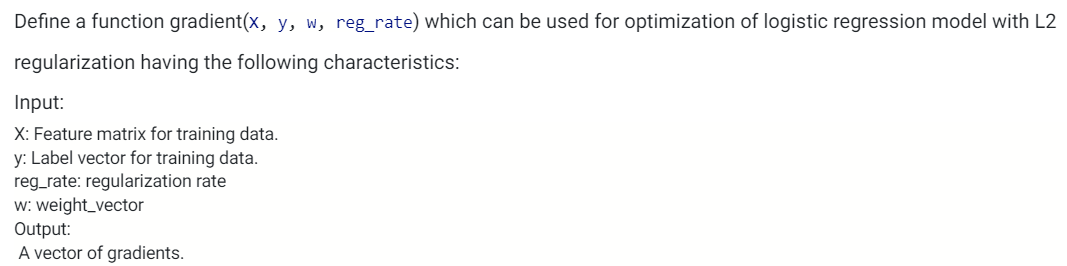

In [ ]:
import numpy as np
def gradient(X,y,w,reg_rate):
  z = X@w
  sig = 1 / (1+np.exp(-z))
  G = np.transpose(X) @ (sig-y) + reg_rate * w
  return G

Wk5 GrPA3

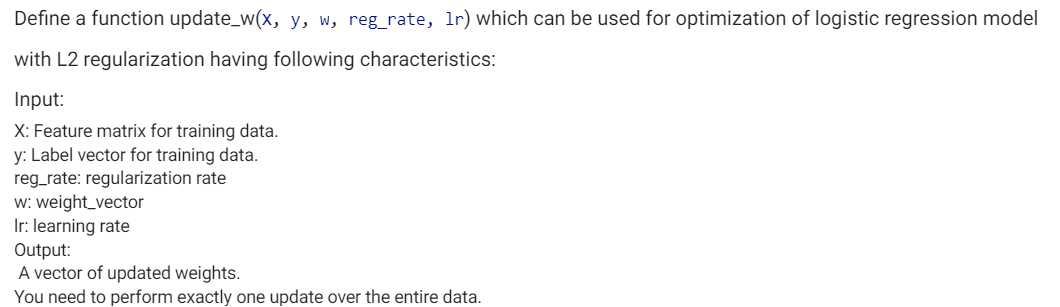

In [ ]:
import numpy as np
def update_w(X,y,w,reg_rate,lr):
  z= X @ w
  sig = 1/(1+np.exp(-z))
  grad = np.transpose(X)@(sig-y) + reg_rate * w
  U=w-lr*grad
  return U



---



# **Week 6**

Wk6 PPA1

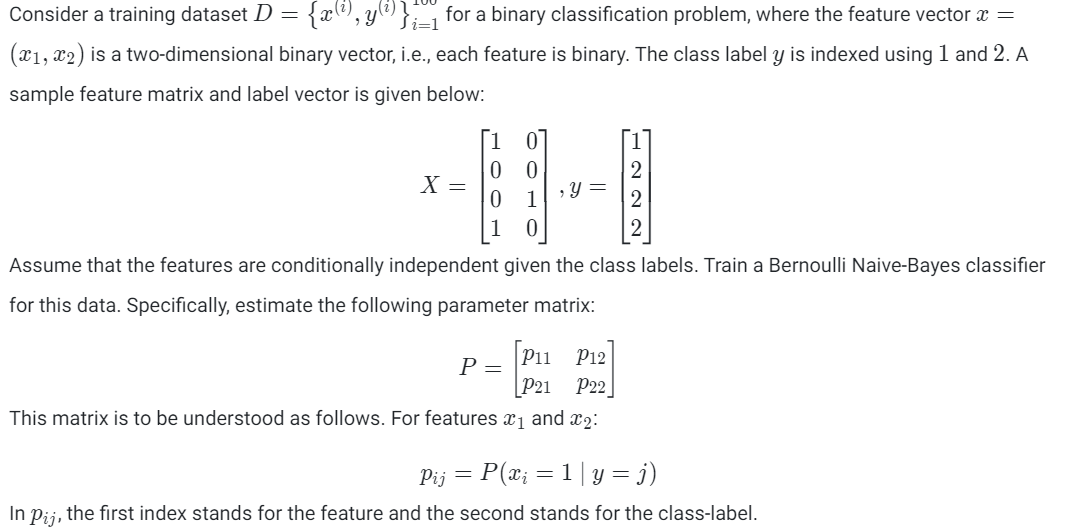

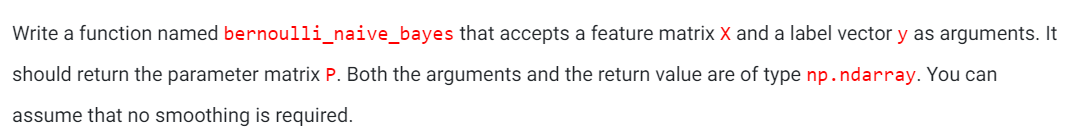

In [ ]:
import numpy as np
def bernoulli_naive_bayes(X, y):
    """
    Estimate the parameter matrix
    
    Arguments:
    	X: feature matrix, (100, 2), np.ndarray
    	y: label vector, (100, ), np.ndarray
    Return:
    	P: parameter matrix, (2, 2), np.ndarray
    """
    n_samples,n_features = X.shape
    classes = np.unique(y)
    n_classes = len(classes)
    w = np.zeros((n_features,n_classes),dtype=np.float64)
    for idx, c in enumerate(classes):
        X_c = X[y==c]
        w[idx,:] = np.sum(X_c,axis = 0)/X_c.shape[0]
    return w.T

Wk6 PPA2

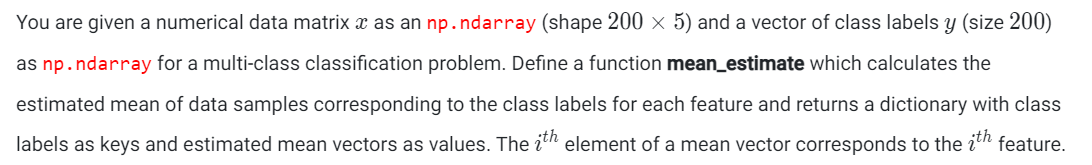

In [ ]:
import numpy as np
def mean_estimate(X: np.ndarray,  y : np.ndarray):
    """
    Estimate the mean of samples for each class

    Arguments:
        X: samples, (200, 5), np.ndarray
        y: labels, (200, ), np.ndarray
    Return:
        D: dictionary
            key: label, int
            value: mean, np.ndarray
    """
    n_samples, n_features = X.shape
    class_count = np.unique(y)
    n_classes = len(class_count)
    mean_est = {}
    for idx, c in enumerate(class_count):
        X_c = X[y==c]
        mean_est[c] = X_c.mean(axis = 0)
    return mean_est

Wk6 PPA3

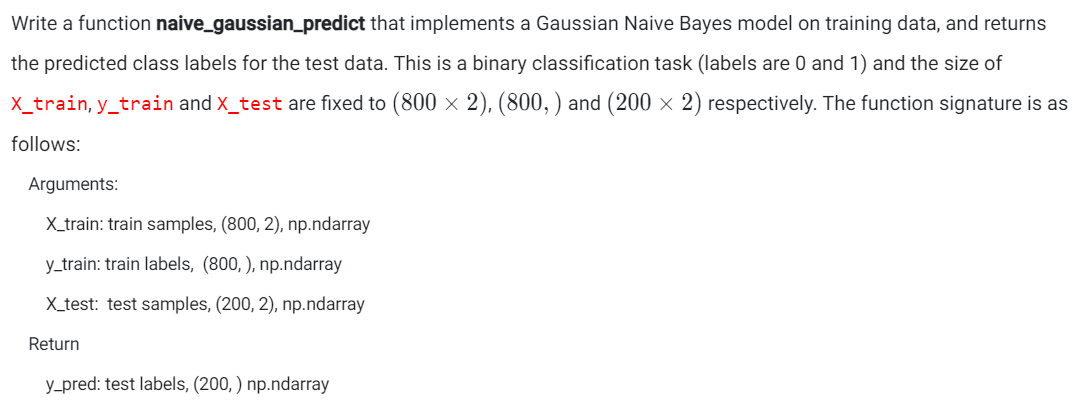

In [ ]:
import numpy as np
def fit(X,y):
    n_samples, n_features = X.shape
    classes = np.unique(y)
    n_classes = len(classes)
    mean = np.zeros((n_classes, n_features), dtype = np.float64)
    var = np.zeros((n_classes, n_features), dtype = np.float64)
    priors = np.zeros(n_classes, dtype=np.float64)
    classes = np.unique(y)

    for idx, c in enumerate(classes):
      X_c = X[y==c]
      mean[idx, :] = X_c.mean(axis = 0)
      var[idx,:] = X_c.var(axis = 0)
      priors[idx] = X_c.shape[0]/ float(n_samples)
    
    return (mean,var,priors,classes)

def calc_pdf(class_idx,X,mean,var):
    mean = mean[class_idx]
    var = np.diag(var[class_idx])
    z = np.power(2*np.pi,X.shape[0]/2) * np.power(np.linalg.det(var),1/2)
    return (1/z) * np.exp(-(1/2)*(X-mean).T @ (np.linalg.inv(var)) @(X-mean))

def calc_prod_likelihood_prior(X,classes,priors,mean,var):
    prod_likelihood_prior = np.zeros((X.shape[0], len(classes)),dtype = np.float64)
    for x_idx, x in enumerate(X):
      for idx, c in enumerate(classes):
        prod_likelihood_prior[x_idx, c] = (np.log(calc_pdf(idx,x,mean,var)) + np.log(priors[idx]))
    
    return prod_likelihood_prior

    
def naive_gaussian_predict(X_train, y_train, X_test):
    """
    Train a Gaussian NB and predict the labels on test set 

    Arguments:
        X_train: train samples, (800, 2), np.ndarray 
        y_train: train labels,  (800, ), np.ndarray 
        X_test:  test samples, (200, 2), np.ndarray
    Return  
        y_pred: test labels, (200, ) np.ndarray
    """
    mean,var,priors,classes = fit(X_train,y_train)
    likelihood_prior = calc_prod_likelihood_prior(X_test,classes,priors,mean,var)
    return np.argmax(likelihood_prior, axis = 1)


Wk6 PPA4

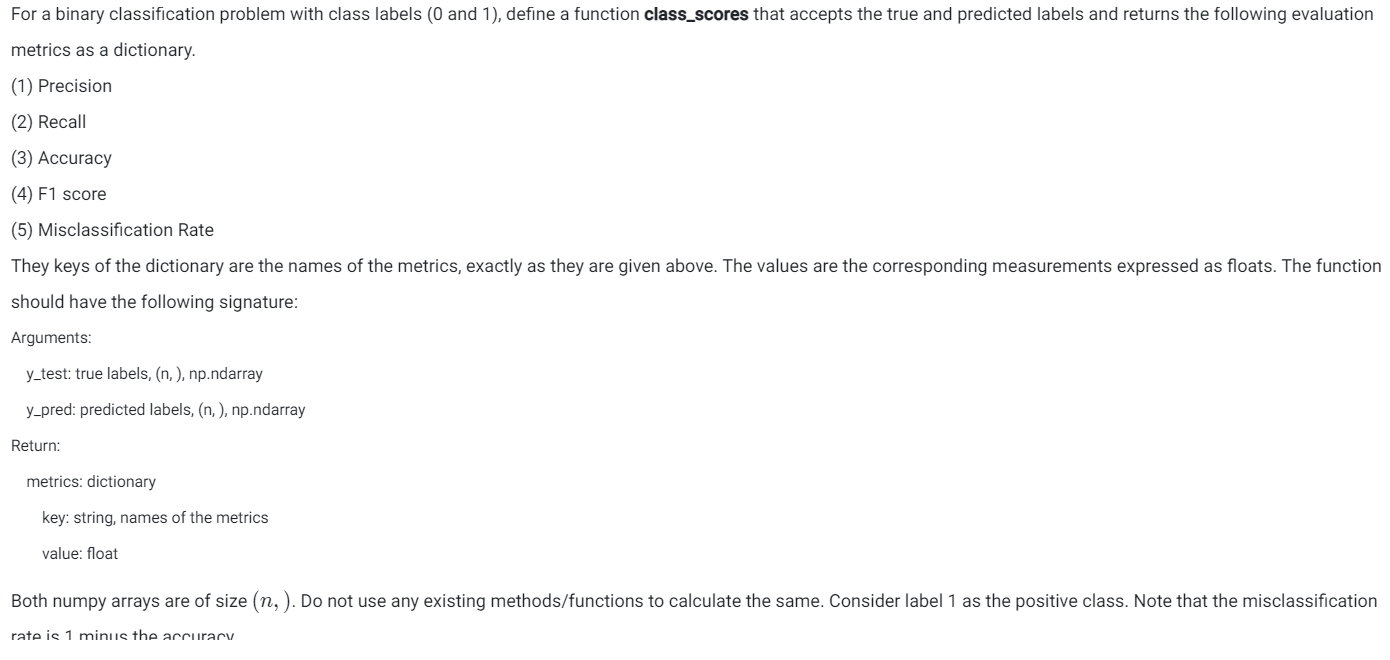

In [ ]:
import numpy as np
def class_scores(y_test: np.ndarray, y_pred: np.ndarray):
    """
    Compute evaluation metrics for a binary classification task
    
    Arguments:  
        y_test: true labels, (n, ), np.ndarray 
        y_pred: predicted labels, (n, ), np.ndarray
    Return:
        metrics: dictionary
            key: string, names of the metrics
            value: float
    """
    TP = np.where((y_pred== 1) & (y_test == 1),1,0).sum()
    TN = np.where((y_pred== 0) & (y_test == 0),1,0).sum()
    FP = np.where((y_pred== 1) & (y_test == 0),1,0).sum()
    FN = np.where((y_pred== 0) & (y_test == 1),1,0).sum()
    
    classification_report = {}
    
    classification_report["Precision"] = float(TP/(TP+FP))
    classification_report["Recall"] = float(TP/(TP+FN))
    classification_report["Recall"] = float(TP/(TP+FN))
    classification_report["Accurancy"] = float((TP+TN)/(TP+TN+FP+FN))
    classification_report["F1 Score"] = float((2*float(TP/(TP+FP))*float(TP/(TP+FN)))/(float(TP/(TP+FP))+float(TP/(TP+FN))))
    classification_report["Misclassification Rate"] = (1-float((TP+TN)/(TP+TN+FP+FN)))
    
    return classification_report
    

Wk6 GrPA1

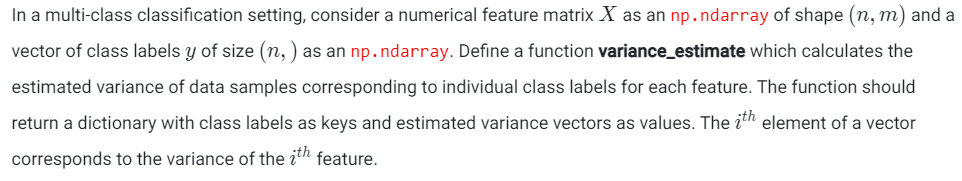

In [ ]:
import numpy as np
def variance_estimate(X: np.ndarray,  y: np.ndarray):
    D = {}
    labels = np.unique(y)
    for label in labels:
        D[label] = np.var(X[y == label], axis = 0)
    return D

Wk6 GrPA2

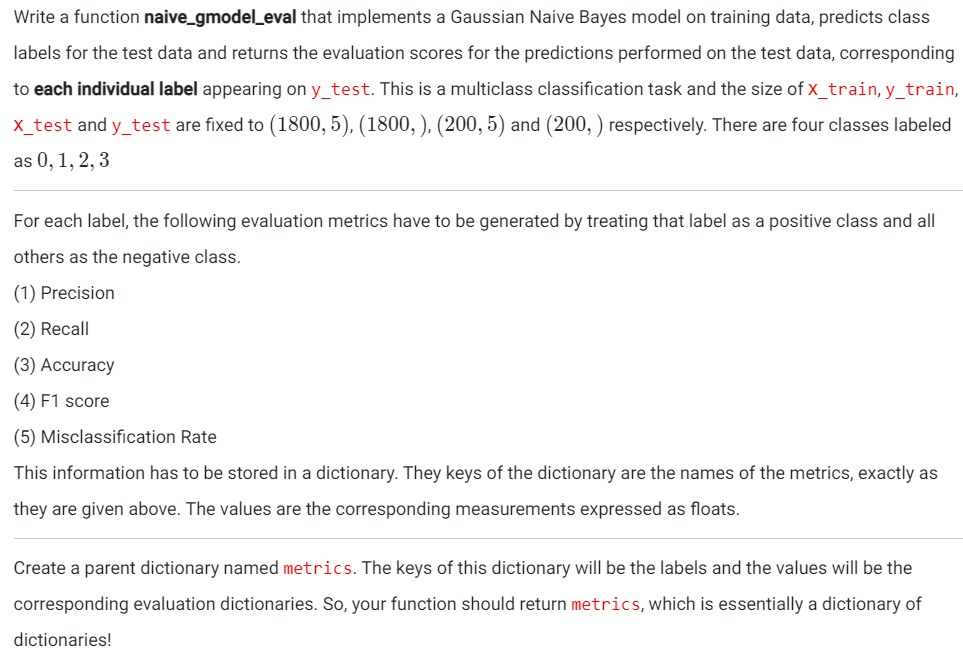

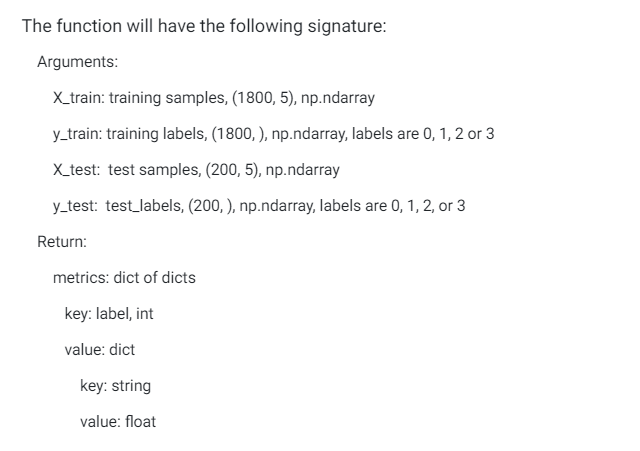

In [ ]:
import numpy as np
def class_scores(y_test, y_pred, positive):
    tp = np.sum((y_test == positive) & (y_pred == positive))
    tn = np.sum((y_test != positive) & (y_pred != positive))
    fp = np.sum((y_test != positive) & (y_pred == positive))
    fn = np.sum((y_test == positive) & (y_pred != positive))

    names = ("Precision", "Recall","Accuracy", "Misclassification Rate","F1 score")
    values = [tp / (tp + fp), tp / (tp + fn), (tp + tn) / (tp + tn + fp + fn)]
    values.append(1 - values[-1])
    values.append(2 * values[0] * values[1] / (values[0] + values[1]))

    scores = dict(zip(names,values))
    return scores

# Solution
class NB(object):

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self._classes = np.unique(y)
        n_classes = len(self._classes)

        # calculate mean, var, and prior for each class
        self._mean = np.zeros((n_classes, n_features), dtype = np.float64)
        self._var = np.zeros((n_classes, n_features), dtype = np.float64)
        self._priors = np.zeros(n_classes, dtype = np.float64)

        for c in self._classes:
            X_c = X[y == c]
            self._mean[c, :] = X_c.mean(axis = 0)
            self._var[c, :] = X_c.var(axis = 0)
            self._priors[c] = X_c.shape[0] / float(n_samples)

    def predict(self, X):
        self._posterior = np.zeros((X.shape[0], len(self._classes)), dtype = np.float64)
        for idx, x in enumerate(X):
            for c in self._classes:
                self._posterior[idx, c] = np.log(self._pdf(c, x)) + np.log(self._priors[c])
        return np.argmax(self._posterior, axis = 1)

    def _pdf(self, class_idx, X):
        mean = self._mean[class_idx]
        var = np.diag(self._var[class_idx])
        z = np.power(2 * np.pi, X.shape[0]/2) * np.power(np.linalg.det(var), 1/2)
        return (1 / z) * np.exp(-(1 / 2) * (X - mean).T @ (np.linalg.inv(var)) @ (X - mean))

def naive_gmodel_eval(X_train, y_train, X_test, y_test):
    gaussian_nb = NB()
    gaussian_nb.fit(X_train, y_train)
    y_pred = gaussian_nb.predict(X_test)

    labels = np.unique(y_train)
    D = {}
    for label in labels:
        D[label] = class_scores(y_test, y_pred, label)
    return D



---



# **Week 7**

Wk7 PPA1

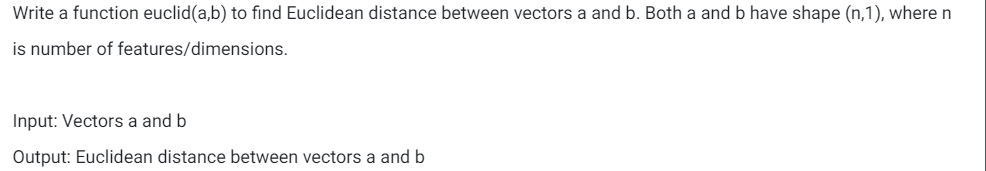

In [ ]:
import numpy as np
def euclid(a,b):
  E = np.sum(np.power((a-b),2),axis = 1)
  return E


Wk7 PPA2

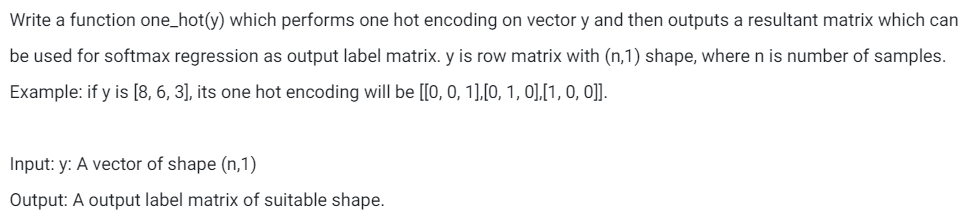

In [ ]:
import numpy as np
def one_hot(y):
  
  label_list = list(np.unique(y))
  
  M = np.zeros((len(y),len(label_list)))
  for i in range(len(y)):
      M[i,label_list.index(y[i][0])] = 1
  return M

Wk7 GrPA1

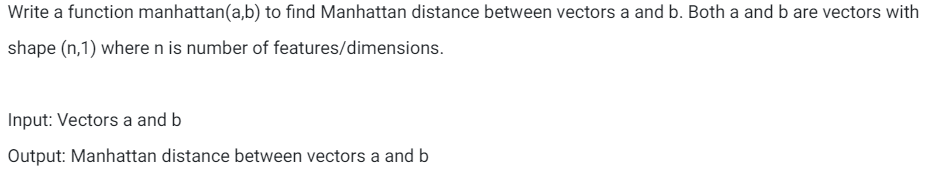

In [ ]:
import numpy as np
def manhattan(a,b):
  dist = np.sum(np.abs(a-b))
  return dist

Wk7 GrPA2

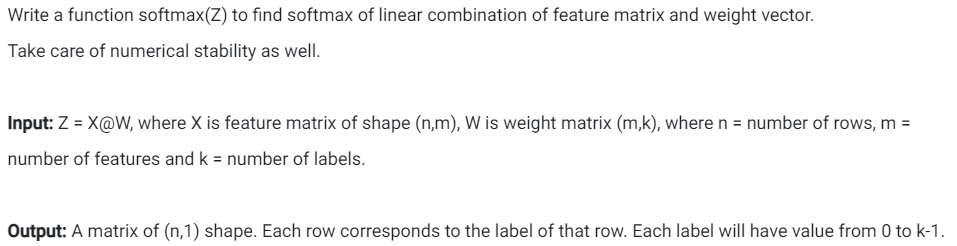

In [ ]:
import numpy as np

#def softmax(Z):
#  exp = np.exp(Z - np.max(Z))   
#  for i in range(len(Z)):
#      exp[i] /= np.sum(exp[i])      
#  return exp

def softmax(Z):
  exp = np.exp(Z)
  row_wise_sum = np.sum(exp, axis = 1).reshape(-1,1)
  t1 = exp * (row_wise_sum @ np.ones((1, exp.shape[1])))
  
  ans = np.argmax(t1,axis =1)

  return ans

Wk7 GrPA3

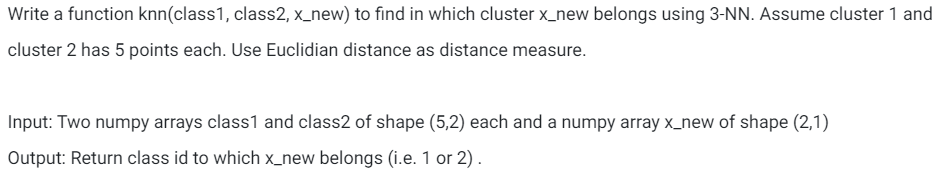

In [ ]:
import numpy as np
def knn(class1,class2,x_new):
  dist1 = np.sum((np.transpose(x_new)-class1)**2,axis=1)  
  dist2 = np.sum((np.transpose(x_new)-class2)**2,axis=1)
  dist1 = np.append([dist1],np.ones((1,5)),axis=0)
  dist2 = np.append([dist2],2*np.ones((1,5)),axis=0)
  dist  = np.concatenate((dist1, dist2), axis=1)
  ii = np.argsort(dist[0])
#  dist  = np.sort(dist, axis=1)
  dist = dist[:,ii]
  if np.sum(dist[1][0:3])<=4:
    return 1
  else:
    return 2



---


# **Week 8**

Wk8 PPA1

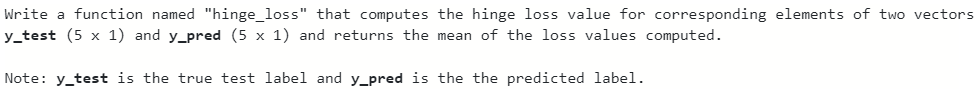

In [ ]:
import numpy as np
def hinge_loss(y_pred,y_test):
  
  return np.sum(y_pred!=y_test)
  

Wk8 PPA2

Write a function 'solve_eqn' to obtain the weight vector (bias as its last element) of linear SVM model by accepting 
an array of support vectors A of shape (3 x 2) and their label vector b of shape (3 x 1). 
This function should return weight vector of shape 3 x 1.  

In [ ]:
import numpy as np
def solve_eqn(A,b):
    A = np.column_stack((A, np.ones(A.shape[0])))
    w = np.linalg.pinv(A) @ b
    return w

Wk8 PPA3

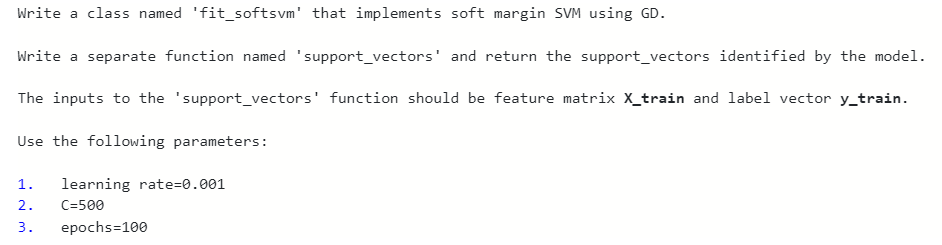

In [ ]:
import numpy as np
class fit_softSVM:
  def __init__(self,C):
    self._support_vectors = None
    self.C = C
    self.w = None
    self.b = None
    self.X = None
    self.y = None

    #n is the number of data points
    self.n = 0

    #d is the number of dimensions
    self.d = 0

  def __decision_function(self,X):
    return X.dot(self.w) + self.b

  def __cost(self,margin):
    return (1/2)*self.w.dot(self.w) + self.C * np.sum(np.maximum(0,1-margin))

  def __margin(self,X,y):
    return y*self.__decision_function(X)

  def fit(self,X,y,lr=1e-3,epochs=500):
    # Initialize w and b
    self.n, self.d = X.shape
    self.w = np.random.randn(self.d)
    self.b = 0

    #Required only for plotting
    self.X = X
    self.y = y

    loss_array = []
    for _ in range(epochs):
      margin = self.__margin(X,y)
      loss = self.__cost(margin)
      loss_array.append(loss)

      misclassified_pts_idx = np.where(margin<1)[0]
      d_w = self.w - self.C * y[misclassified_pts_idx].dot(X[misclassified_pts_idx])
      self.w = self.w - lr*d_w
      d_b = -self.C*np.sum(y[misclassified_pts_idx])
      self.b = self.b - lr * d_b 

    self._support_vectors = np.where(self.__margin(X,y)<=1)[0]

  def predict(self,X):
    return np.sign(self.__decision_function(X))

  def score(self,X,y):
    P = self.predict(X)
    return np.mean(y==P)


# Main function

def support_vectors(X_train, y_train):
      svm = fit_softSVM(C=500)
      svm.fit(X_train,y_train)
      return svm._support_vectors

Wk8 GrPA1

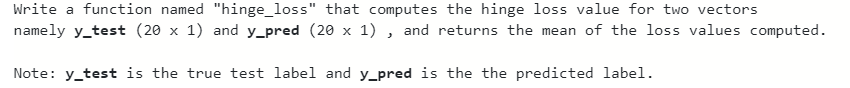

In [ ]:
import numpy as np
def hinge_loss(X,Y):
  loss = np.mean([max(0, 1-x*y) for x, y in zip(X,Y)])
  return loss

Wk8 GrPA2

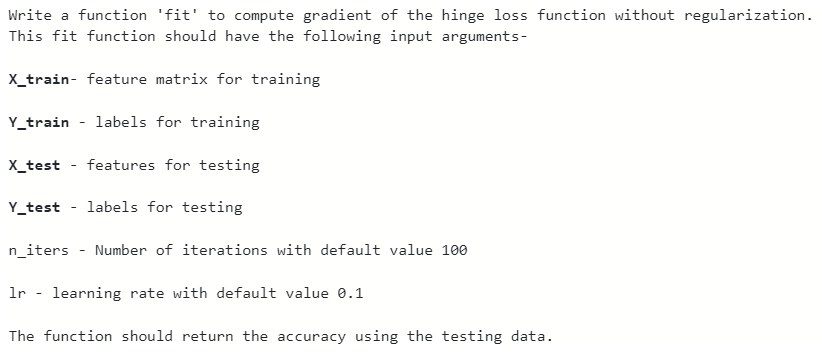

In [ ]:
import numpy as np
def fit(X_train,Y_train,X_test,Y_test,n_iters=100,lr=0.1):
    n,d = X_train.shape
    w = np.random.rand(d)
    b = 0
    C = 1

    X = X_train
    y = Y_train
    loss_array = []

    for _ in range(n_iters):
      Margin = margin(X,y,w,b)
      loss = cost(w,C,Margin)
      loss_array.append(loss)

      misclassified_pts_idx = np.where(Margin < 1)[0]
      d_w = w - C * y[misclassified_pts_idx].dot(X[misclassified_pts_idx])
      w = w - lr*d_w

      d_b =- C* np.sum(y[misclassified_pts_idx])
      b = b - lr* d_b

    support_vectors = np.where(margin(X,y,w,b) <= 1)[0]
    y_hat = np.sign(decision_function(X_test,w,b))
    accuracy = np.mean(Y_test == y_hat)
    return accuracy
def decision_function(X,w,b):
    return X.dot(w) + b

def cost(w,C, margin):
    return (1/2) * w.dot(w) + C * np.sum(np.maximum(0,1-margin))

def margin(X, y,w,b):
    return y * decision_function(X,w,b)

Wk8 GrPA3

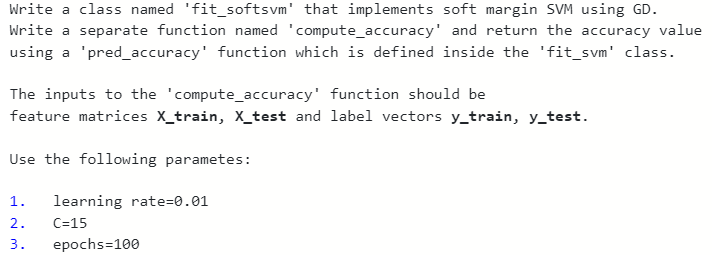

In [ ]:
import numpy as np
class fit_softSVM:
    def __init__(self, C=15):
        self._support_vectors = None
        self.C = C
        self.w = None
        self.b = None
        self.X = None
        self.y = None
 
        # n is the number of data points
        self.n = 0
 
        # d is the number of dimensions
        self.d = 0
 
    def __decision_function(self, X):
        return X.dot(self.w) + self.b
 
    def __cost(self, margin):
        return (1 / 2) * self.w.dot(self.w) + self.C * np.sum(np.maximum(0, 1 - margin))
 
    def __margin(self, X, y):
        return y * self.__decision_function(X)
 
    def fit(self, X, y, lr=0.01, epochs=100):
        # Initialize w and b
        self.n, self.d = X.shape
        self.w = np.random.randn(self.d)
        self.b = 0
 
        # Required only for plotting
        self.X = X
        self.y = y
 
        loss_array = []
        for _ in range(epochs):
            margin = self.__margin(X, y)
            loss = self.__cost(margin)
            loss_array.append(loss)
 
            misclassified_pts_idx = np.where(margin < 1)[0]
            d_w = self.w - self.C * y[misclassified_pts_idx].dot(X[misclassified_pts_idx])
            self.w = self.w - lr * d_w
 
            d_b = - self.C * np.sum(y[misclassified_pts_idx])
            self.b = self.b - lr * d_b
 
        self._support_vectors = np.where(self.__margin(X, y) <= 1)[0]
 
    def predict(self, X):
        return np.sign(self.__decision_function(X))
 
    def score(self, X, y):
        P = self.predict(X)
        return np.mean(y == P)

def compute_accuracy(X_train, y_train,X_test,  y_test):
  svm = fit_softSVM()
  svm.fit(X_train, y_train)
  return svm.score(X_test,  y_test)



---



# **Week 9**

Wk9 PPA1

Consider a regression problem with feature matrix X with size (100, 10) and label vector y with size (100, 1). We split this root node into two nodes 'node1' and 'node2' according to jth split variable and split value 's'.
Define a function `predict_node(X, y, j, s)` that takes X, y, split variable j and split value s as parameters and returns the tuple of predict values (mean value) at both the nodes.

X = ndarray of size (100, 10) with entries as float.

y = ndarray of size (100, 1) with entries as float.

j = int

s = float

In [ ]:
import numpy as np
def predict_node(X, y, j, s):
    node1 =[]
    node2 =[]
    for i in range((X.shape[0])):
        if X[i][j]<=s:
            node1.append(y[i])
        else:
            node2.append(y[i])
    m1= sum(node1)/len(node1)
    m2= sum(node2)/len(node2)
    return ((m1[0], m2[0]))


Wk9 PPA2

Define a function `predict_class(y)` that takes the parameter
`y` which is a ndarray of actual outputs of all the samples in a particualar node and retruns the predict class for the same node.

Note: number of classes are 10 (0 to 9). 

If two classes have same number of samples, function should return the lower class. 

In [ ]:
import numpy as np
def predict_class(y):
  u,f=np.unique(y,return_counts=True)
  f = list(f)
  m = f.index(max(f))
  return u[m]

Wk9 PPA3

Define a function `misclassification_error(y)`  that takes the parameter `y` which is a ndarray of actual outputs of all the samples in a particular node and return the misclassification error of the same node.


In [ ]:
import numpy as np
import random
def misclassification_error(y):
  u,f=np.unique(y,return_counts=True)
  value=np.where(f==np.max(f))
  sum=0
  for i in y:
      if i!=value:
          sum+=1
  return sum/len(y)

Wk9 GrPA1

Define a function `gini_index(dict)` having the 
following characteristics:

Input:
`dict` = dictionary that has classes as keys and 'number of samples in respective class' as values of a particular node.

Output:
Gini index of the same node. (A float value)

In [ ]:
import numpy as np
def gini_index(dict):
    n = sum(dict.values())
    p_sum = 0
    for value in dict.values():
        p_sum = p_sum  +  (value / n ) * (value / n ) 
    gini = 1 - p_sum
    return gini

Wk9 GrPA2

Define a function `entropy(dict)` having the 
following characteristics:

Input:
`dict` = dictionary that has classes as keys and 'number of samples in respective class' as values of a particular node.

Output:
Entropy of the same node. (A float value)


In [ ]:
import numpy as np
def entropy(dict):
  classes = dict.keys()
  samples = sum(dict.values())
  Entropy = 0
  for k in classes:
      p = dict[k]/samples
      Entropy += (-p*np.log2(p))
  return Entropy

Wk9 GrPA3

Consider a regression problem using CART. If y is a ndarray of targets of the samples in a particular node, define a function `sseloss(y)` that returns the error associated with that node.


In [ ]:
import numpy as np
def sseloss(y):
  y_mean = np.mean(y)
  error = np.sum((y-y_mean)**2,axis=0)
  return error



---



# **Week 10**

Wk10 PPA1

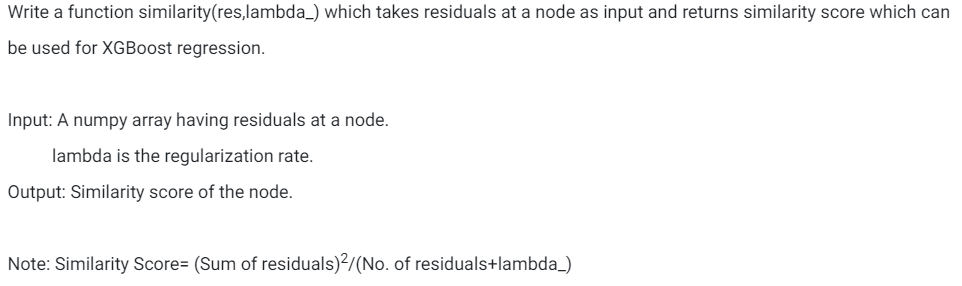

In [ ]:
import numpy as np
def similarity(res,lambda_):
    s = np.sum(res)
    d = len(res)+lambda_
    similarity = (s**2)/d
    return similarity

Wk10 PPA2

Write a function gradboost(model,X_train, y_train, X_test, boosting_rounds,learning_rate) to implement Gradient boost algorithm.

Input:
model: model to be fitted
X_train: Training features
y_train: Training output labels
X_test: Test feature values
boosting_rounds: number of boosting rounds
learning_rate: learning rate used in the algorithm

Output:
y_hat_train: Prediction on training data after number of boosting rounds
y_hat_test:  Prediction on testing data after number of boosting rounds


In [ ]:
import numpy as np
import pandas as pd
def gradboost(model, X_train, y_train, X_test, boosting_rounds, learning_rate):
    y_hat_train= np.repeat(np.mean(y_train), len(y_train))
    y_hat_test= np.repeat(np.mean(y_train), len(X_test))
    res= y_train-y_hat_train
    
    for i in range(0, boosting_rounds):
        model= model.fit(X_train,res)
        y_hat_train = y_hat_train+ learning_rate* model.predict(X_train)
        y_hat_test = y_hat_test+ learning_rate* model.predict(X_test)
        res= y_train-y_hat_train
    return y_hat_train, y_hat_test
#PPA 2 code is right in my opinion, but its not wroking though.



Wk10 GrPA1

Write a function reidual(y) which takes a numpy array y as input and calculates residuals for base model(taking mean of the target values).

Input: numpy array y having all the target values.
Output: numpy array containing residuals.

In [ ]:
import numpy as np
def residual(y):
  y_hat= np.repeat(np.mean(y), len(y))
  res=y-y_hat
  return res

Wk10 GrPA2

Write a function accuracy(y_true,y_pred) which calculates accuracy of classification based on inputs y_true and y_pred.

Input: y_true- vector of true output labels y_pred-vector of predicted output labels.
Output: accuracy of classification

In [ ]:
import numpy as np
def accuracy(y_true,y_pred):
  accuracy = np.sum(y_true == y_pred) / len(y_true)
  return accuracy

Wk10 GrPA3

Write a function bag(X,y)  for creating q bootstrap from original dataset.

Input: X is the feature matrix and y is the output label vector
Output: Bootstrap containing two numpy arrays containing feature values and corresponding target values.

In [ ]:
import numpy as np
def bag(X,y):
  n_samples = X.shape[0]
  np.random.seed(42)
  indices = np.random.choice(n_samples, size = n_samples, replace=True)
  return X[indices], y[indices]

# **Week 11**

Wk11 PPA1

Write a function euclid(a,b) to find Euclidean distance between vectors a and b.

Input: Vectors a and b

Return: Euclidean distance between vectors a and b

Note: both vectors are of shape (m, ), where m is some positive integer.

In [ ]:
import numpy as np
def euclid(a,b):
    E= np.linalg.norm(a - b)
    
    return E

Wk11 GrPA1

Write a function to centroid(a,b) to find centroid of vectors a and b.

Input: a and b are numpy arrays of same shape.
Output: centroid of a and b as numpy array

In [ ]:
import numpy as np
def centroid(a,b):
  c=[]
  count = a.shape[0]
  for i in range(count):
    c.append((a[i]+b[i])/2)
  return np.array(c)

Wk11 GrPA2

Write a function silhoutte(a,b) to calculate silhoutte coefficient.

Input: a is the mean distance between the instances in the cluster and b is the mean distance between the instance and the instances in the next closest cluster.
Output: Silhoutte coefficient

In [ ]:
import random
def silhoutte(a,b):
  s= (a*b)/max(a,b)
  return s

In [ ]:
def decision_function(X,w,b):
  return X.dot(w)+b
def margin(X,y,w,b):
  return y-decision_function(X,w,b)
def Cost(C,X,y,w,b):
  return 0.5*w.dot(w)+C*np.sum(max(0.1-margin(X,y,w,b)))


In [ ]:
def fit(X_train,y_train,X_test,y_test,n_iters,lr):
  num_data,num_features=X_train.shape
  w=np.zeros(num_features)
  b=0

  for i in range(n_iters):
    for idx,x_i in enumerate(X_train):
      condition=y_train[idx]*(np.dot(X_train,w)-b)>=1
      if condition:
        pass
      else:
        w-=lr*np.dot(x_i,y_train[idx])
        b-=lr*y_train[idx]
  predict=np.dot(X_test,w)-b
  y_pred=np.sign(predict)
  accuracy=np.sum(y_test==y_pred)/num_data
  return accuracy

In [ ]:
class fit_softSVM:
  def __init__(self) -> None:
      self.support_vectors=None
      self.C=15
      self.X=None
      self.y=None
      self.w=None
      self.b=None

      self.n=0
      self.d=0
  def decision(self,X):
    return X.dot(self.w)+self.b
  def margin(self,X,y):
    return y*self.decision(X)
  def cost(self,margin):
    return 0.5*self.w.dot(self.w)+self.C*np.sum(np.maximum(0,1-margin))
  def fit(self,X,y,lr=0.01,epochs=100):
    self.n,self.d=X.shape
    self.w=np.zeros(self.d)
    self.b=0

    for i in range(epochs):
      margin
